# I improve, therefore I am.

Oh the *dude* got new data!
* **first reaction**:  yoohoo I have more data ....
* **after some seconds**: OOHHH shit I've spend days to build my previous model with the previous data. I don't start building the model from scratch!!! girrrrrr

.
.
.

Asghar: what's up dude ... you look like (biiib) 

Dude: lablab lab lab lab

Asghar: Do you know about *H2O checkpoints* ? It is labl lab lab lablab ... ¯\\(ツ)/¯ 

Dude: **\m/**

## Import the required libraries


In [2]:
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

import pandas as pd
from ggplot import *
import getpass
%matplotlib inline
import seaborn as sns

## Connecting to the H2O cluster (with you own credential)

In [3]:

h2o.init(port = 54324,
         username = "aghorbani", 
         password = getpass.getpass())

········


/home/ubuntu/.local/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/ubuntu/.local/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


H2O cluster uptime:,2 hours 2 minutes 55 seconds 628 milliseconds
H2O cluster version:,3.9.1.3458
H2O cluster name:,AwesomeCloud
H2O cluster total nodes:,1
H2O cluster total free memory:,6.96 GB
H2O cluster total cores:,8
H2O cluster allowed cores:,2
H2O cluster healthy:,True
H2O Connection ip:,127.0.0.1
H2O Connection port:,54324
H2O Connection proxy:,None


In [4]:
dl = h2o.get_model("yooHoo_my_awesome_dl")

In [5]:
data_frame2 = h2o.upload_file("../data/attrition.csv", 
                              col_types = (["numeric"]*8 + ["enum"]), 
                              destination_frame = "data_frame2")


Parse Progress: [##################################################] 100%


In [6]:
data_frame2.describe()

Rows:160 Cols:9

Chunk compression summary: 


chunk_type,chunk_name,count,count_percentage,size,size_percentage
CBS,Bits,3,33.333336,270 B,12.747875
C1N,1-Byte Integers (w/o NAs),5,55.555557,1.1 KB,53.824364
C4,4-Byte Integers,1,11.111112,708 B,33.42776



Frame distribution summary: 


,size,number_of_rows,number_of_chunks_per_column,number_of_chunks
172.31.16.145:54324,2.1 KB,160.0,1.0,9.0
mean,2.1 KB,160.0,1.0,9.0
min,2.1 KB,160.0,1.0,9.0
max,2.1 KB,160.0,1.0,9.0
stddev,0 B,0.0,0.0,0.0
total,2.1 KB,160.0,1.0,9.0


,CustID,Gender,Age,Income,FamilySize,Education,Calls,Visits,Churn
type,int,int,int,int,int,int,int,int,enum
mins,101901.0,0.0,17.0,0.0,1.0,12.0,3.0,0.0,0.0
mean,151143.5,0.58125,35.66875,0.50625,3.13125,14.9625,25.21875,1.90625,0.53125
maxs,199131.0,1.0,82.0,1.0,5.0,20.0,65.0,5.0,1.0
sigma,28408.9141624,0.494903268612,16.3359856177,0.501530675899,1.04081411652,2.60113062016,13.3098875031,1.46573816379,0.500589275396
zeros,0,67,0,79,0,0,0,31,75
missing,0,0,0,0,0,0,0,0,0
0,101901.0,1.0,30.0,0.0,5.0,20.0,37.0,3.0,1
1,102056.0,0.0,17.0,1.0,1.0,12.0,25.0,1.0,0
2,102522.0,1.0,54.0,1.0,4.0,18.0,48.0,3.0,1


## Build new model

In [7]:
my_new_dl = H2ODeepLearningEstimator(
    activation            = "TanhWithDropout",
    epochs                = 1200,
    input_dropout_ratio   = 0.2,
    hidden                = [10,10], 
    hidden_dropout_ratios = [0.2,0.2],
    score_interval        = 0.0001,
    checkpoint      = "yooHoo_my_awesome_dl",
    model_id        = "yooHoo_my_awesome_dl_continued")

my_new_dl.train(x = list(range(1,8)),
                y = 8,
                training_frame   = data_frame2,
                validation_frame = "valid_frame")


deeplearning Model Build Progress: [##################################################] 100%


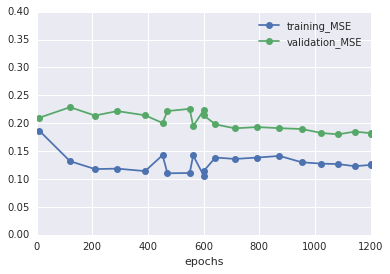

In [16]:
dat = my_new_dl.scoring_history().sort_values(by="epochs")
dat.plot(x = "epochs", y = ["training_MSE","validation_MSE"], ylim=[0,.4], marker='o')